In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(X_train,y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

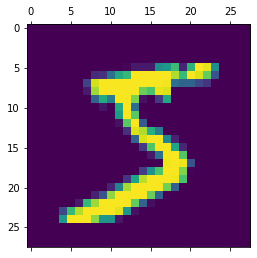

In [12]:
plt.matshow(X_train[0])

In [13]:
y_train[0]

5

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train_flatten = X_train.reshape(len(X_train) , 28*28)

In [16]:
X_test_flatten = X_test.reshape(len(X_test)  , 28*28)

In [18]:
X_test_flatten.shape

(10000, 784)

In [22]:
model = keras.Sequential([keras.layers.Dense(10 , input_shape = (784 ,) , activation = 'sigmoid')])
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [24]:
model.fit(X_train_flatten , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 9.7607 - accuracy: 0.8392
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.1697 - accuracy: 0.8771
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.7620 - accuracy: 0.8816
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4026 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2502 - accuracy: 0.8864


As from the above we can see that the accuracy is very low around 47 percent avg so we have to scale our model first

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
X_train_flatten = X_train.reshape(len(X_train) , 28*28)
X_test_flatten = X_test.reshape(len(X_test)  , 28*28)

In [27]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
model = keras.Sequential([keras.layers.Dense(10 , input_shape = (784 ,) , activation = 'sigmoid')])
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(X_train_flatten , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4665 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3035 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9257


As you can now see from the above the accuacy is increase so scaling helps in increasing the accuracy of the model

In [35]:
model.evaluate(X_test_flatten , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9269


[0.2662930488586426, 0.9269000291824341]

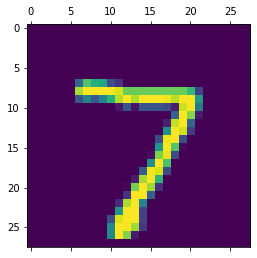

In [37]:
plt.matshow(X_test[0])

In [41]:
model_predicted = model.predict(X_test_flatten)
model_predicted[0]
# The output is in the form of array having 10 values from 0 to 9

313/313 [==============================] - 1s 2ms/step


array([1.3366715e-02, 4.3929595e-07, 7.9627611e-02, 9.6088171e-01,
       1.5385258e-03, 1.3347690e-01, 1.6506093e-06, 9.9966103e-01,
       1.0758369e-01, 6.4320266e-01], dtype=float32)

In [50]:
np.argmax(model_predicted[0])

7

In [51]:
model_predicted_label = [np.argmax(i) for i in model_predicted]

In [54]:
cm = tf.math.confusion_matrix(labels = y_test , predictions =model_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    4,    2,    0,    7,    8,    2,    3,    1],
       [   0, 1115,    4,    1,    0,    1,    4,    2,    8,    0],
       [   3,    9,  928,   19,    8,    4,   11,    8,   39,    3],
       [   0,    0,   18,  931,    1,   19,    1,    9,   25,    6],
       [   2,    1,    7,    1,  916,    0,    7,    4,   10,   34],
       [   7,    3,    5,   37,    7,  789,    8,    4,   28,    4],
       [   9,    3,    9,    1,    7,   21,  902,    2,    4,    0],
       [   1,    8,   25,    8,    7,    1,    0,  937,    4,   37],
       [   4,    8,    5,   21,    9,   27,    8,    7,  878,    7],
       [   8,    7,    2,   10,   26,    9,    0,   15,   12,  920]])>

Text(0.5, 42.0, 'Predicted')

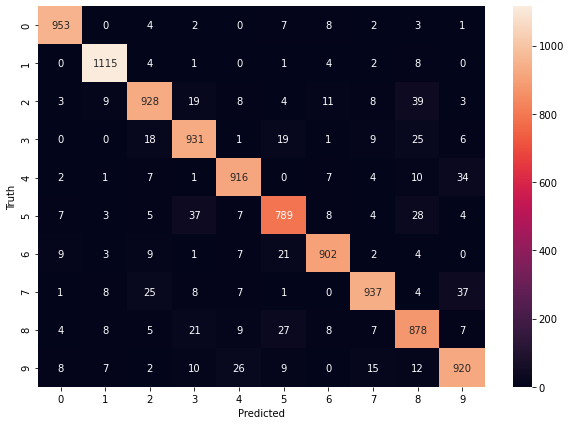

In [65]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm , annot  = True , fmt = 'd')
plt.ylabel("Truth")
plt.xlabel("Predicted")

In [68]:
model = keras.Sequential([keras.layers.Dense(100 , input_shape = (784 ,) , activation = 'relu'),
                      keras.layers.Dense(10, activation = 'sigmoid')])
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(X_train_flatten , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1203 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0849 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9846


In [69]:
model.evaluate(X_test_flatten , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9747


[0.08263122290372849, 0.9746999740600586]

You can use flatten function from keras so you don't have to flatter for each function

In [74]:
model = keras.Sequential([
                      keras.layers.Flatten(input_shape = (28 ,28)),
                      keras.layers.Dense(100 , activation = 'relu'),
                      keras.layers.Dense(10, activation = 'sigmoid')])


model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])


model.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2759 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1264 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0884 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9840
